In [19]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display,HTML

In [20]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target = raw_df.values[1::2, 2]
#create dataframe
boston = pd.DataFrame(data, columns=feature_names)
boston['MEDV']=target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [21]:
X = boston.drop(columns=['MEDV'])
y = boston['MEDV'].values.reshape(-1,1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=np.c_[np.ones((len(X),1)),X]
lm=0.01
betas = np.linalg.inv(X.T.dot(X)+lm*np.identity(len(X.T.dot(X)))).dot(X.T).dot(y)


In [23]:
pd.options.display.float_format = "{:,.2f}".format

In [24]:
index=['BIAS','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
 'TAX', 'PTRATIO', 'B', 'LSTAT']
pd.DataFrame(betas,columns=['Beta value'],index=index).T

,BIAS,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Beta value,26.54,-9.57,4.63,0.56,2.69,-8.60,19.91,0.07,-16.16,7.02,-6.45,-8.94,3.71,-19.00


In [25]:
#Ridge regression with Gradient Descent
X = X

n = X.shape[0]
d = X.shape[1]
print('No of samples:',n,'and No of features:',d)

No of samples: 506 and No of features: 14


In [26]:
def initialize_betas(X,y):
    np.random.seed(0)
    betas = np.random.randn(d,1)
    return betas
betas = initialize_betas(X,y)
print(betas.shape)

(14, 1)


In [27]:
def calculate_cost(betas):
    cost=1/(2*n) * np.sum(np.square(y-np.dot(X, betas))) + (lm/(2*n)) * np.sum(np.square(betas))
    return cost

print('Cost of ridge regression with random betas: ', calculate_cost(betas))

Cost of ridge regression with random betas:  201.5767128072047


In [30]:
lm=0.01
def calculate_gradients(betas, lm):
    gradients=((1/n)*np.dot(X.T,(np.dot(X,betas)-y))+(lm/n)*betas)
    return gradients

print(f'Gradients for random betas = \n{calculate_gradients(betas,lm)} ')

Gradients for random betas = 
[[-17.76799424]
 [ -0.35396529]
 [ -2.8144031 ]
 [ -5.72414928]
 [ -1.52344185]
 [ -5.21639823]
 [-10.14089749]
 [-10.95493409]
 [ -4.79003558]
 [ -5.13020129]
 [ -5.98593094]
 [ -9.90502901]
 [-16.67594573]
 [ -3.98356663]] 


In [31]:
def gradient_descent(X,y):
    np.random.seed(0)
    no_of_iterations = 5000
    alpha = 0.01
    train_error=[]
    betas=np.random.rand(d,1)
    
    for i in range(1, no_of_iterations):
        train_cost = calculate_cost(betas)
        train_error.append(train_cost)
        
        betas = betas - alpha * calculate_gradients(betas, lm)
        
    return betas, train_error

In [32]:
betas, train_error = gradient_descent(X,y)
pd.DataFrame(betas, columns=['Beta value'],index=index)

,Beta value
BIAS,13.33
CRIM,-2.08
ZN,3.61
INDUS,-1.30
CHAS,3.92
NOX,-1.11
RM,21.05
AGE,1.74
DIS,-2.43
RAD,2.52


Train Error: 12.92


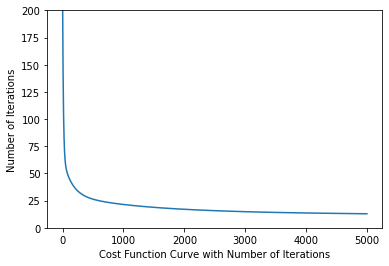

In [44]:
print('Train Error: {0:.2f}'.format(train_error[-1]))
plt.plot(np.arange(len(train_error)),train_error)
plt.xlabel('Cost Function Curve with Number of Iterations')
plt.ylabel('Number of Iterations')
plt.ylim(0,200)
plt.show()